<a href="https://colab.research.google.com/github/Sarah1542/Test3-Forest-CoverType-Classification/blob/main/Forest_Cover_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#-----------------Imports-------------------

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

#-----------Uplode & Read DataSet---------

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
print("Uploaded files:", uploaded.keys())
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
pd.set_option('display.max_columns', None)
print(df.head())

Saving forest_dataset.csv to forest_dataset (2).csv
Uploaded files: dict_keys(['forest_dataset (2).csv'])
      0    1   2    3   4     5    6    7    8     9  10  11  12  13  14  15  \
0  2683  333  35   30  26  2743  121  173  179  6572   1   0   0   0   0   0   
1  2915   90   8  216  11  4433  232  228  129  4019   1   0   0   0   0   0   
2  2941  162   7  698  76  2783  227  242  148  1784   0   0   1   0   0   0   
3  3096   60  17  170   3  3303  231  202   99  5370   1   0   0   0   0   0   
4  2999   66   8  488  37  1532  228  225  131  2290   0   0   1   0   0   0   

   16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   

#--------------Data Cleaning-----------------


In [ ]:
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10000 non-null  int64
 1   1       10000 non-null  int64
 2   2       10000 non-null  int64
 3   3       10000 non-null  int64
 4   4       10000 non-null  int64
 5   5       10000 non-null  int64
 6   6       10000 non-null  int64
 7   7       10000 non-null  int64
 8   8       10000 non-null  int64
 9   9       10000 non-null  int64
 10  10      10000 non-null  int64
 11  11      10000 non-null  int64
 12  12      10000 non-null  int64
 13  13      10000 non-null  int64
 14  14      10000 non-null  int64
 15  15      10000 non-null  int64
 16  16      10000 non-null  int64
 17  17      10000 non-null  int64
 18  18      10000 non-null  int64
 19  19      10000 non-null  int64
 20  20      10000 non-null  int64
 21  21      10000 non-null  int64
 22  22      10000 non-null  int64
 23  23      1000

#-----------Dataset Visualization-------------


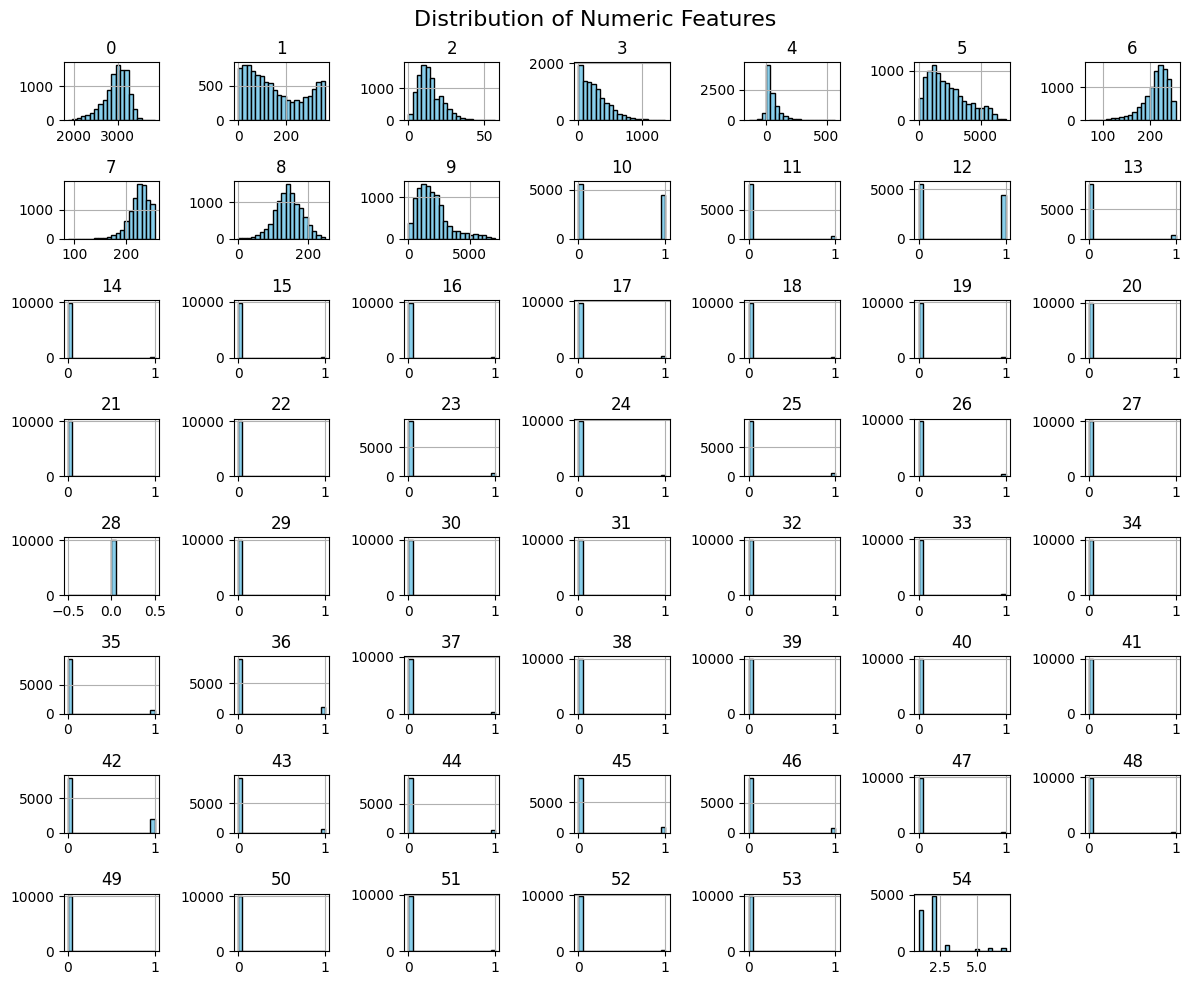

In [ ]:
#"Distribution of Numeric Features"

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols].hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


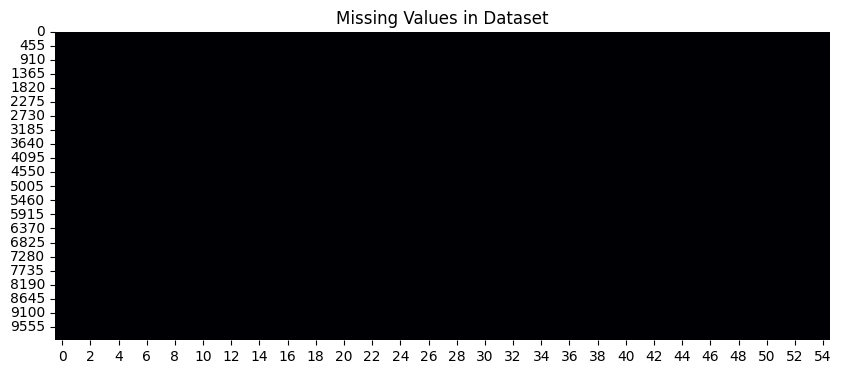

In [ ]:
#"Missing Values in Dataset"
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.title("Missing Values in Dataset")
plt.show()



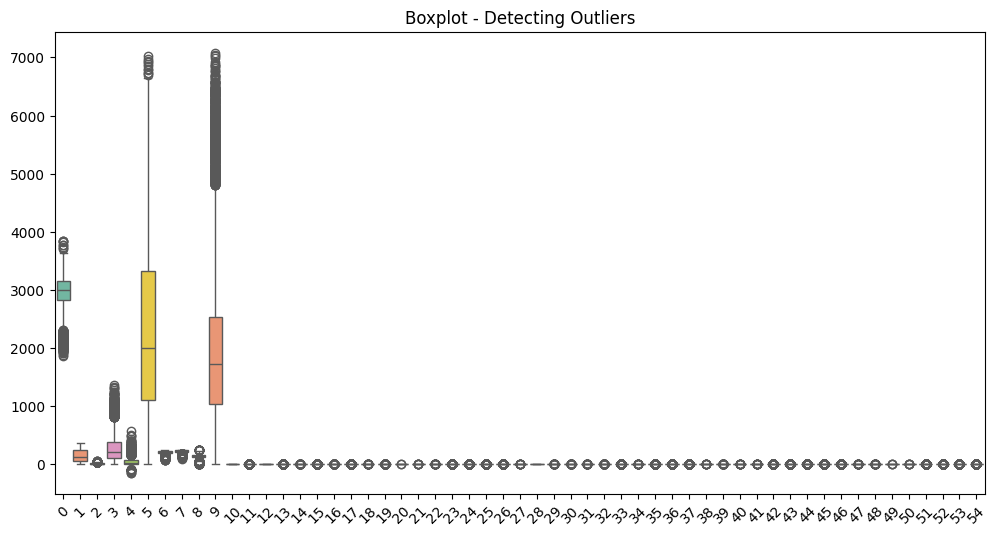

In [ ]:
#"Boxplot - Detecting Outliers"
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot - Detecting Outliers")
plt.show()

#---------------Split Data Train/Test----------

In [ ]:
x=df.drop('54',axis=1)
y=df["54"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


------------------------Scaling--------------------

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

----------------------LogisticRegression-----------------

In [ ]:
LG_model=LogisticRegression(max_iter=5000)
LG_model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

------------------------LRModel Prediction---------------------

In [ ]:
y_pred=LG_model.predict(x_test)

--------------------------Evaluation for LR-------------------

In [ ]:
logistic_accuracy=(accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.69      0.70       736
           2       0.74      0.80      0.77       973
           3       0.65      0.81      0.72       111
           4       0.67      0.73      0.70        11
           5       0.00      0.00      0.00        33
           6       0.57      0.21      0.31        56
           7       0.82      0.53      0.64        80

    accuracy                           0.72      2000
   macro avg       0.59      0.54      0.55      2000
weighted avg       0.71      0.72      0.71      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


------------------------Random Forest-------------------------

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train,y_train)

RandomForestClassifier()

-----------------------RF Prediction---------------------------

In [ ]:
y_pred_rf=rf_model.predict(x_test)


---------------------Evaluation for RF-------------------

In [ ]:
rf_accuracy=(accuracy_score(y_test, y_pred_rf))
print("Accuracy:",rf_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.802
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.78      0.79       736
           2       0.81      0.87      0.84       973
           3       0.73      0.86      0.79       111
           4       1.00      0.73      0.84        11
           5       0.67      0.18      0.29        33
           6       0.72      0.38      0.49        56
           7       0.95      0.69      0.80        80

    accuracy                           0.80      2000
   macro avg       0.81      0.64      0.69      2000
weighted avg       0.80      0.80      0.80      2000



------------------------Decision Tree Model-------------------------

In [ ]:
Dt_model=DecisionTreeClassifier()
Dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

-----------------------DT Prediction---------------------------

In [ ]:
y_pred_dt=Dt_model.predict(x_test)

---------------------Evaluation for DT-------------------

In [ ]:
dt_accuracy= accuracy_score(y_test, y_pred_dt)
print("Accuracy:",dt_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.702
Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.71      0.70       736
           2       0.76      0.73      0.75       973
           3       0.68      0.68      0.68       111
           4       0.55      0.55      0.55        11
           5       0.20      0.30      0.24        33
           6       0.51      0.48      0.50        56
           7       0.75      0.59      0.66        80

    accuracy                           0.70      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.71      0.70      0.70      2000



-------------------Comparision Between Models---------------------

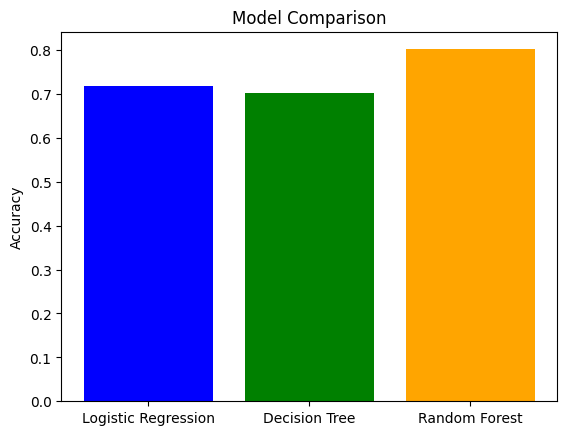

In [ ]:
accuracies = {
    "Logistic Regression": logistic_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy
}
plt.bar(list(accuracies.keys()), list(accuracies.values()), color=['blue','green','orange'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [ ]:
import joblib

# Save models
joblib.dump(LG_model, "logistic_model.pkl")
joblib.dump(Dt_model, "decision_tree_model.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")


['random_forest_model.pkl']

In [ ]:
from google.colab import files
files.download("logistic_model.pkl")
files.download("decision_tree_model.pkl")
files.download("random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>